In [75]:
#Imports
import json
import pandas as pd
from omdbapi.movie_search import GetMovie

In [76]:
# OMDB API KEY Declaration & List of Top 50 Movies in 2019 from https://www.boxofficemojo.com/year/world/2019/ 
movie = GetMovie(api_key='9e3906f0')

movies = ['Avengers: Endgame', 'The Lion King', 'Frozen II', 'Spider-Man: Far from Home', 'Captain Marvel',
          'Joker', 'Star Wars: Episode IX - The Rise of Skywalker', 'Toy Story 4', 'Aladdin', 'Jumanji: The Next Level', 'Fast & Furious Presents: Hobbs & Shaw	', 'Ne Zha', 'The Wandering Earth', 'How to Train Your Dragon: The Hidden World', 'Maleficent: Mistress of Evil', 'It Chapter Two', 'My People, My Country', 'Pokémon Detective Pikachu', 'The Secret Life of Pets 2', 'The Captain', 'Alita: Battle Angel', 'Godzilla: King of the Monsters', '1917', 'Once Upon a Time in Hollywood', 'Shazam!', 'Dumbo', 'Crazy Alien', 'John Wick: Chapter 3 - Parabellum', 'Knives Out', 'Terminator: Dark Fate', 'Parasite', 'Pegasus', 'Us', 'Men in Black: International', 'X-Men: Dark Phoenix', 'Glass', 'The Bravest', 'Annabelle Comes Home', 'Better Days', 'Ford v Ferrari', 'Little Women', 'The Addams Family', 'Rocketman', 'Weathering with You', 'The Lego Movie 2: The Second Part', 'Downton Abbey', 'Sheep Without a Shepherd', 'The White Storm 2: Drug Lords', 'Abominable', 'Ip Man 4: The Finale']


In [77]:
#Create Top_50_Movies JSON File and load each movie as an item in the json file
with open('top_50_movies.json', 'w') as outfile:
    outfile.write("[")
    for m in movies[:-1]:
        json.dump(movie.get_movie(title=m), outfile)
        outfile.write(',')
    json.dump(movie.get_movie(title=movies[-1]), outfile)
    outfile.write("]")

In [78]:
#Open File and Verify Length. Should be 50
with open('top_50_movies.json', 'r') as f:
    data = json.load(f)

print(len(data))

50


Text(0.5, 0, 'Last 10 of Top 50 Movies Ratings Compared')

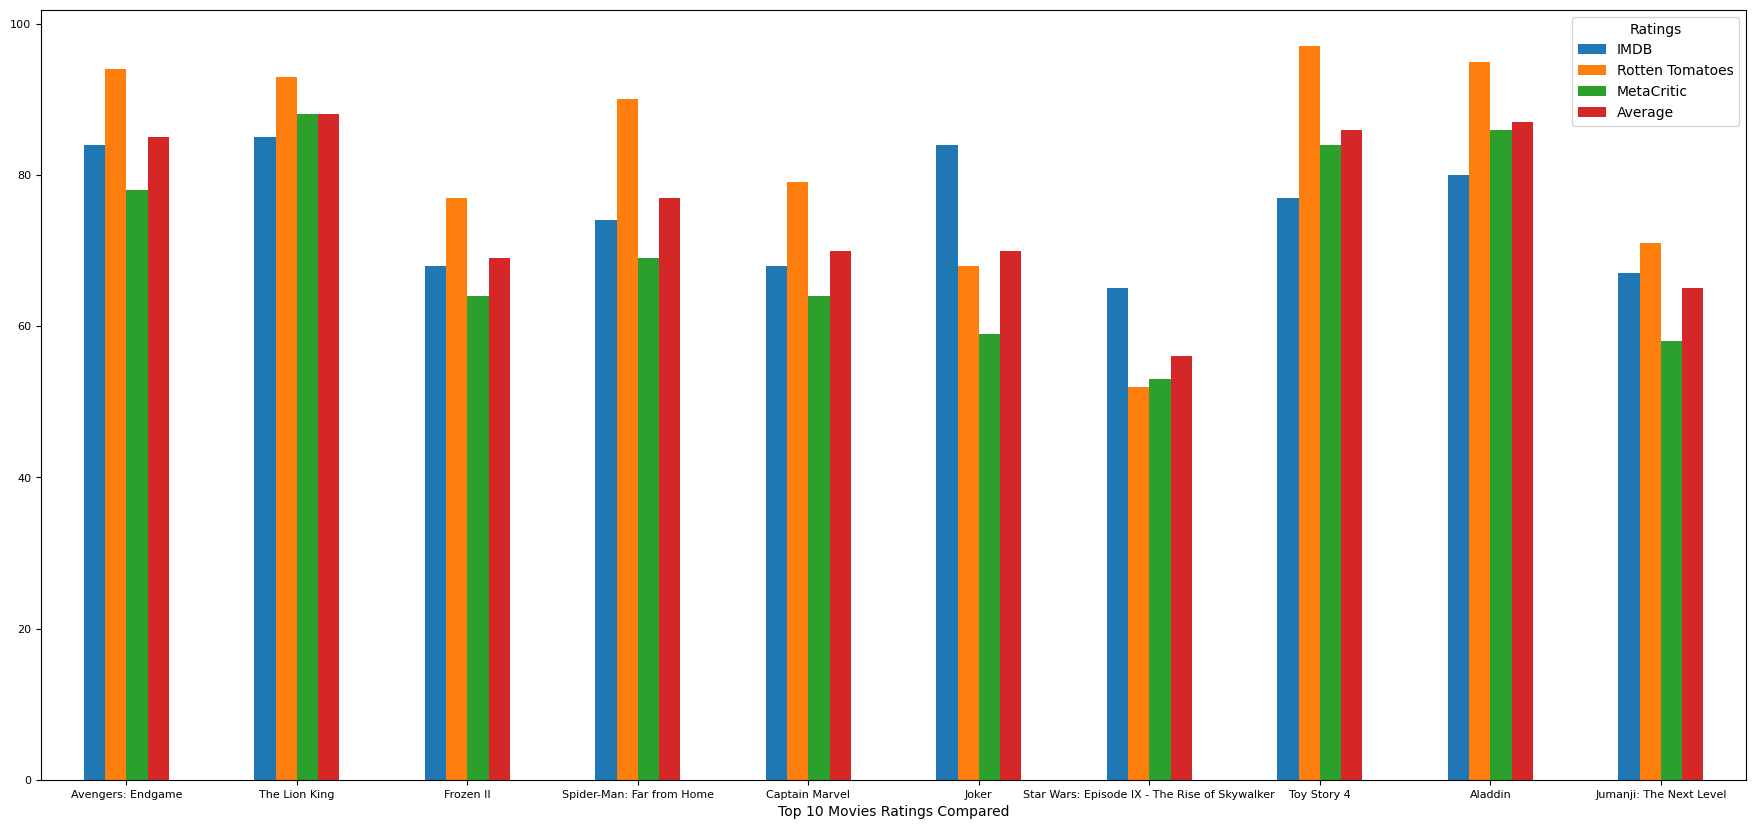

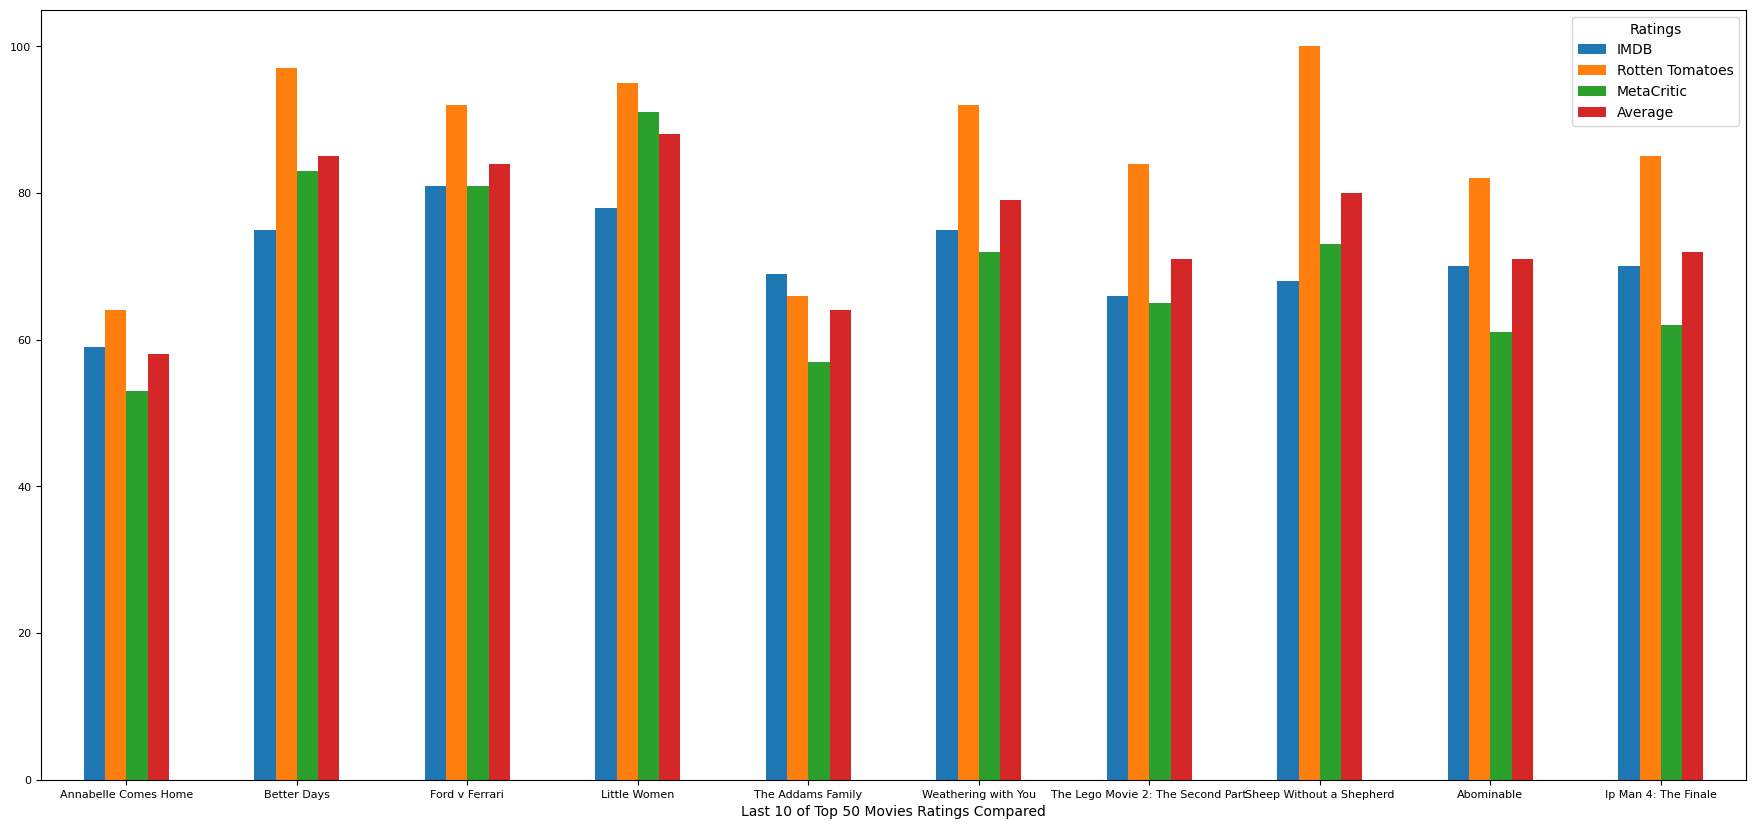

In [88]:
#Create Pandas Dataframe for IMDB, Rotten Tomatoes, and Metacritic scores and their averages for each movie that has scores for all 3 (49 of them)

#Functions to convert each specific website's scoring system to a uniform /100 score
def imdb_convert(imdb_string):
    new_string = imdb_string.replace('.', '').replace('/10', '')
    imdb_score = int(new_string)
    return imdb_score

def rt_convert(rt_string):
    new_string = rt_string.replace('%', '')
    rt_score = int(new_string)
    return rt_score

def meta_convert(meta_string):
    new_string = meta_string.replace("/100", '')
    meta_score = int(new_string)
    return meta_score

movie_titles = []
imdb_scores = []
rotten_scores = []
meta_scores = []
average_scores = []

for m in data:
    if(len(m['ratings']) == 3):
        movie_titles.append(m['title'])
        imdb_score = imdb_convert(m['ratings'][0]['Value'])
        imdb_scores.append(imdb_score)
        rt_score = rt_convert(m['ratings'][1]['Value'])
        rotten_scores.append(rt_score)
        meta_score = meta_convert(m['ratings'][2]['Value'])
        meta_scores.append(meta_score)
        average_scores.append(int((imdb_score + rt_score + meta_score)/3))

df = pd.DataFrame({'Top 10 Movies Ratings Compared': movie_titles, 'IMDB': imdb_scores, 'Rotten Tomatoes': rotten_scores, 'MetaCritic': meta_scores, 'Average': average_scores})

ax = df.head(10).plot.bar(x='Top 10 Movies Ratings Compared', rot=0, figsize=(22,10), fontsize=8)
ax.legend(title="Ratings")
ax.set_xlabel("Top 10 Movies Ratings Compared")

ax2= df.tail(10).plot.bar(x='Top 10 Movies Ratings Compared', rot=0, figsize=(22,10), fontsize=8)
ax2.legend(title="Ratings")
ax2.set_xlabel("Last 10 of Top 50 Movies Ratings Compared")


In [80]:
# Actors with more than 1 Experience
actors_table = []
for m in data: 
    actors_table.append(m['actors'])

split_list = []
for m in actors_table:
    split_list.append(m.split(','))

single_list = []
duplicate_list = []
for i in split_list:
    for x in i:
        if x not in single_list:
            single_list.append(x)
        elif x in duplicate_list:
            single_list.append(x)
        else:
            duplicate_list.append(x)

print("The Following Actors Appeared in Multiple Movies from the List of Top 50 from 2019: \n")
for m in duplicate_list:
    print(m.strip())


The Following Actors Appeared in Multiple Movies from the List of Top 50 from 2019: 

Samuel L. Jackson
Dwayne Johnson
Kevin Hart
Bo Huang
Chris Evans
James McAvoy
Zhuo Tan


In [81]:
# Average Runtime of all Movies
runtime_table = []

def remove_min(input_string):
    new_string = input_string.replace(' min', '')
    runtime_int = int(new_string)
    return runtime_int

for m in data:
    row = {"Movie": m['title'], "Runtime": remove_min(m['runtime'])}
    runtime_table.append(row)
df = pd.DataFrame(runtime_table).set_index("Movie")

print(df)
print("\nAverage Movie Runtime: ", int(df.mean(0)), "minutes.")


                                               Runtime
Movie                                                 
Avengers: Endgame                                  181
The Lion King                                       88
Frozen II                                          103
Spider-Man: Far from Home                          129
Captain Marvel                                     123
Joker                                              122
Star Wars: Episode IX - The Rise of Skywalker      141
Toy Story 4                                        100
Aladdin                                             90
Jumanji: The Next Level                            123
Fast & Furious Presents: Hobbs & Shaw              137
Ne Zha                                             110
The Wandering Earth                                125
How to Train Your Dragon: The Hidden World         104
Maleficent: Mistress of Evil                       119
It Chapter Two                                     169
My People,

In [11]:
# Box Office Compared to Movie Runtime


In [ ]:
# Box Office Compared To Ratings

In [ ]:
# Box Office Compared to  Rated